<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/kingMinusWoman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 10th Sep, 2021
Folder: C:\Users\ashok\OneDrive\Documents\bagOfWordsMeetsBagofPopcorn\smallexpt
	    	/home/ashok/Documents/9.word2vec

Google word2vec slim
        https://github.com/eyaler/word2vec-slim


Kaggle:
    https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-2-word-vectors

Analytics Vidhya:    
    https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
    
Objective:
    Experimentation with pre-created word2vec file
    Works with gensim >= 4.0
    
"""

In [ ]:
# 0.0 Install gensim and bug-free numpy
! pip install gensim==4.1.0 
! pip install numpy==1.20.1

## Call Libraries

In [ ]:
# 1.0 Reset variables. Import module to manipulate word2vec files
#%reset -f
# conda install -c anaconda gensim
# conda installs an older version of gensim
import gensim
from gensim.models.keyedvectors import KeyedVectors
import os
gensim.__version__   # 4.1.0

'4.1.0'

In [ ]:
# 1.0.1 Mount google drive to access
#       word2vec file from my gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Skip-gram model
Refer this blog: [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

Quoted from the blog:
"
>We’re going to train the neural network to do the following. Given a specific word in the middle of a sentence (the input word), look at the words nearby and pick one at random. The network is going to tell us the probability for every word in our vocabulary of being the “nearby word” that we chose.
>When I say "nearby", there is actually a "window size" parameter to the algorithm. A typical window size might be 5, meaning 5 words behind and 5 words ahead (10 in total).

>The output probabilities are going to relate to how likely it is find each vocabulary word nearby our input word. For example, if you gave the trained network the input word “Soviet”, the output probabilities are going to be much higher for words like “Union” and “Russia” than for unrelated words like “watermelon” and “kangaroo”.

>We’ll train the neural network to do this by feeding it word pairs found in our training documents. The below example shows some of the training samples (word pairs) we would take from the sentence “The quick brown fox jumps over the lazy dog.” I’ve used a small window size of 2 just for the example. The word highlighted in blue is the input word.

"

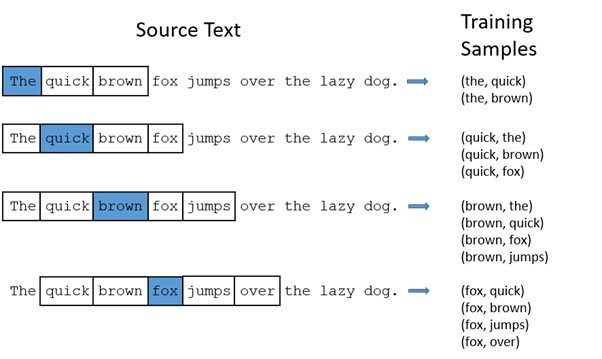

### Model Details

>"First of all, you know you can’t feed a word just as a text string to a neural network, so we need a way to represent the words to the network. To do this, we first build a vocabulary of words from our training documents–let’s say we have a vocabulary of 10,000 unique words.

>We’re going to represent an input word like “ants” as a one-hot vector. This vector will have 10,000 components (one for every word in our vocabulary) and we’ll place a “1” in the position corresponding to the word “ants”, and 0s in all of the other positions.

>The output of the network is a single vector (also with 10,000 components) containing, for every word in our vocabulary, the probability that a randomly selected nearby word is that vocabulary word.

>Here’s the architecture of our neural network.

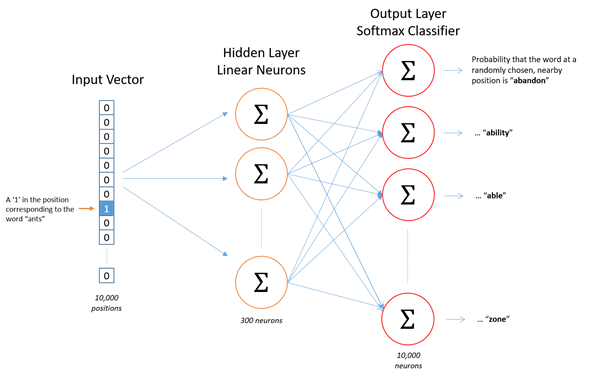

One Hots allow us to activate only one input neuron at once. So the representation of the word falls down to specific weights just for that word. Here, the one hot for 'juice' is activating just 4 synaptic links per synapse.

See [word embedding visual inspector](https://ronxin.github.io/wevi/). See the results of one experiment at the end of this notebook.

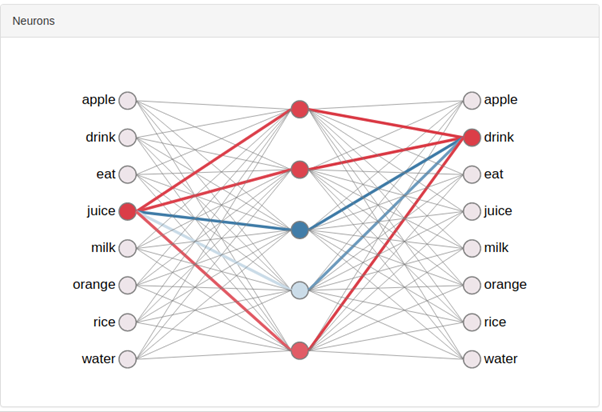

>Now, you might be asking yourself–“That one-hot vector is almost all zeros… what’s the effect of that?” If you multiply a 1 x 10,000 one-hot vector by a 10,000 x 300 matrix, it will effectively just select the matrix row corresponding to the “1”. Here’s a small example to give you a visual.

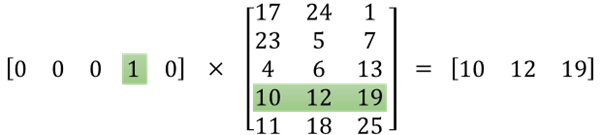

>This means that the hidden layer of this model is really just operating as a lookup table. The output of the hidden layer is just the “word vector” for the input word.

In [ ]:
# 2.0 Download vector model. Takes time
#     But even if part is downloaded, it will work
#     Downloaded model is in memory NOT on disk

# model = api.load('word2vec-google-news-300')

In [ ]:
# 2.1 Else, mount gdrive and set path 
#     to Google word2vec (slim) file 
#     This slim file is available at:
#     https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz
#

In [ ]:
# 3. Else, set path to Kaggle's word2vec file folder
#    In your gdrive (bagofpopcorn):

os.chdir("/content/drive/MyDrive/Colab_data_files/word2vec/")

In [ ]:
# 4.0 Load the word2vec file
#    (takes time)
#     Refer bagofpopcorn.py. This file was created by Ashok K Harnal
#      File size is around 59MB
model =   KeyedVectors.load('300features_40minwords_10context.gz', mmap = None)


In [ ]:
# 4.0.1 Have a look at operators available
#       Press tab to have a look.
model.wv.

In [ ]:
# 4.1
model.wv.doesnt_match("man woman child kitchen".split())   # 'kitchen'

'kitchen'

In [ ]:
# 4.1.1
model.wv.doesnt_match("man woman child cow".split())   # cow


'cow'

In [ ]:
#4.1.2 
model.wv.doesnt_match("france england germany berlin".split())   # berlin


'berlin'

In [ ]:
# 4.1.3
model.wv.doesnt_match("paris berlin london austria".split())   # austria


'paris'

In [ ]:
# 4.1.4
model.wv.most_similar("man")  


[('woman', 0.6254014372825623),
 ('lad', 0.5897815227508545),
 ('lady', 0.5896257162094116),
 ('soldier', 0.5538835525512695),
 ('guy', 0.5263450741767883),
 ('men', 0.5252613425254822),
 ('person', 0.5234428644180298),
 ('businessman', 0.5173948407173157),
 ('monk', 0.5137553811073303),
 ('loner', 0.5119930505752563)]

In [ ]:
# 4.1.5
model.wv.most_similar("queen")

[('princess', 0.6680407524108887),
 ('bride', 0.6045001149177551),
 ('stepmother', 0.5974058508872986),
 ('victoria', 0.5969752073287964),
 ('dame', 0.5853109359741211),
 ('showgirl', 0.5819121599197388),
 ('maria', 0.5809970498085022),
 ('latifah', 0.5800352692604065),
 ('eva', 0.5745376944541931),
 ('anita', 0.5699288845062256)]

In [ ]:
# 4.1.6
model.wv.most_similar("awful")

[('terrible', 0.773497462272644),
 ('atrocious', 0.726247251033783),
 ('dreadful', 0.7210407853126526),
 ('horrible', 0.7197018265724182),
 ('abysmal', 0.7099337577819824),
 ('horrendous', 0.6860306859016418),
 ('horrid', 0.6697106957435608),
 ('appalling', 0.6539225578308105),
 ('amateurish', 0.6097128987312317),
 ('lousy', 0.6085333824157715)]

In [ ]:
# 4.1.7
model.wv.most_similar("bank")     # 'bank' has two meanings. River bank. Finance bank.


[('robbery', 0.6693954467773438),
 ('ranch', 0.6567532420158386),
 ('loan', 0.6546927690505981),
 ('robbers', 0.6538708806037903),
 ('cattle', 0.6504669785499573),
 ('security', 0.6486033201217651),
 ('loot', 0.6473209857940674),
 ('factory', 0.6468525528907776),
 ('robber', 0.6461599469184875),
 ('nearby', 0.6442009806632996)]

#### Maths with word2vec model. Two vectors get added and one subtracted.
King – Man + Woman = ?

In [ ]:
# 5.0 Get vectors of few words
vec_king =  model.wv['king']
vec_man =   model.wv['man']
vec_woman = model.wv['woman']
vec_queen = model.wv['queen']

In [ ]:
# 5.1
result = model.wv.most_similar(
                               positive=['woman', 'king'],
                               negative=['man'],
                               topn=1
                               )
print(result)

[('queen', 0.5817553997039795)]


In [ ]:
# 5.2
result = model.wv.most_similar(
                                positive=['woman', 'king'],
                                negative=['man'],
                                topn=3
                               )

print(result)

[('queen', 0.5817553997039795), ('princess', 0.5068495273590088), ('prince', 0.4993061423301697)]


In [ ]:
# 5.3
model.wv.most_similar(
                       positive=[ 'king'],
                       negative=['woman']
                      )

[('stephen', 0.44891202449798584),
 ('iii', 0.43700486421585083),
 ('hong', 0.41367438435554504),
 ('kings', 0.4029046893119812),
 ('conan', 0.4006439447402954),
 ('doyle', 0.4003871977329254),
 ('solomon', 0.39914470911026),
 ('lotr', 0.3912689685821533),
 ('luther', 0.3862456679344177),
 ('fleischer', 0.38413700461387634)]

In [ ]:
# 5.4
result = model.wv.most_similar(
                                positive=['woman', 'uncle'],
                                negative=['man'],
                                topn=1
                               )
print(result)

[('aunt', 0.7528471350669861)]


In [ ]:
#################### I am done #####################

##[WEVI Experiment](https://ronxin.github.io/wevi/)

In WEVI, replace existing training data with the following. The following data pertains on the one hand to <b>fruits</b> and on the other hand to <b>class</b> related objects. Use this data to perform skipgram experiment.

><i>eat|apple,eat|orange,eat|rice,drink|juice,drink|milk,drink|water,orange|juice,apple|juice,rice|milk,milk|drink,water|drink,juice|drink,class|whiteboard,whiteboard|class,class|whiteboard,whiteboard|class,class|whiteboard,whiteboard|class,class|MSTeams,MSTeams|class,MSTeams|attendance,attendance|MSTeams,class|attendance,Mike|whiteboard,whiteboard|mike</i>

Word2Vec created are the following. Clearly distinction can be seen between <i>'class'</i> related objects and <i>'fruits'</i> related objects.

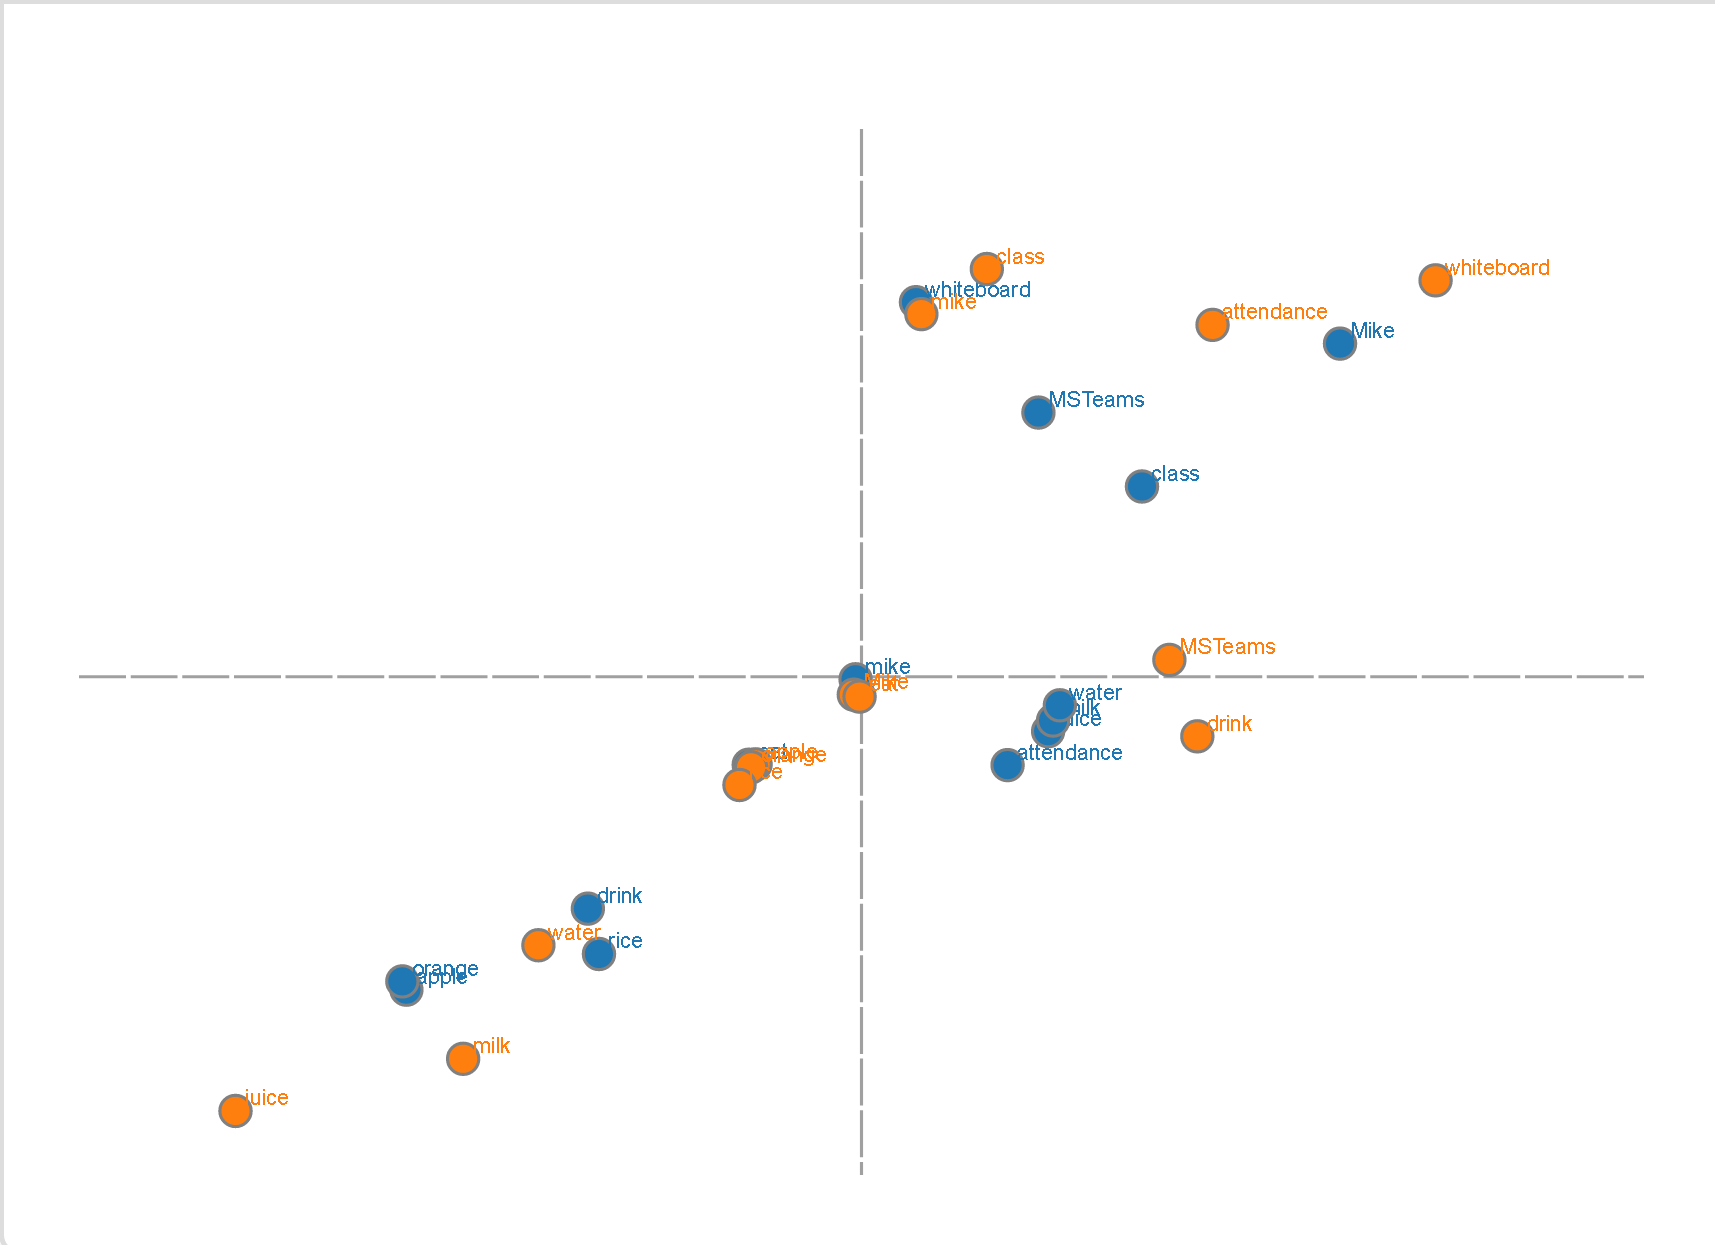

After training 500 times, see similarity in weights (indicated by colour shades) of those items related to <i>class objects</i> and those related to <i>fruits</i>. Input Vector is the Word2Vec transformation.

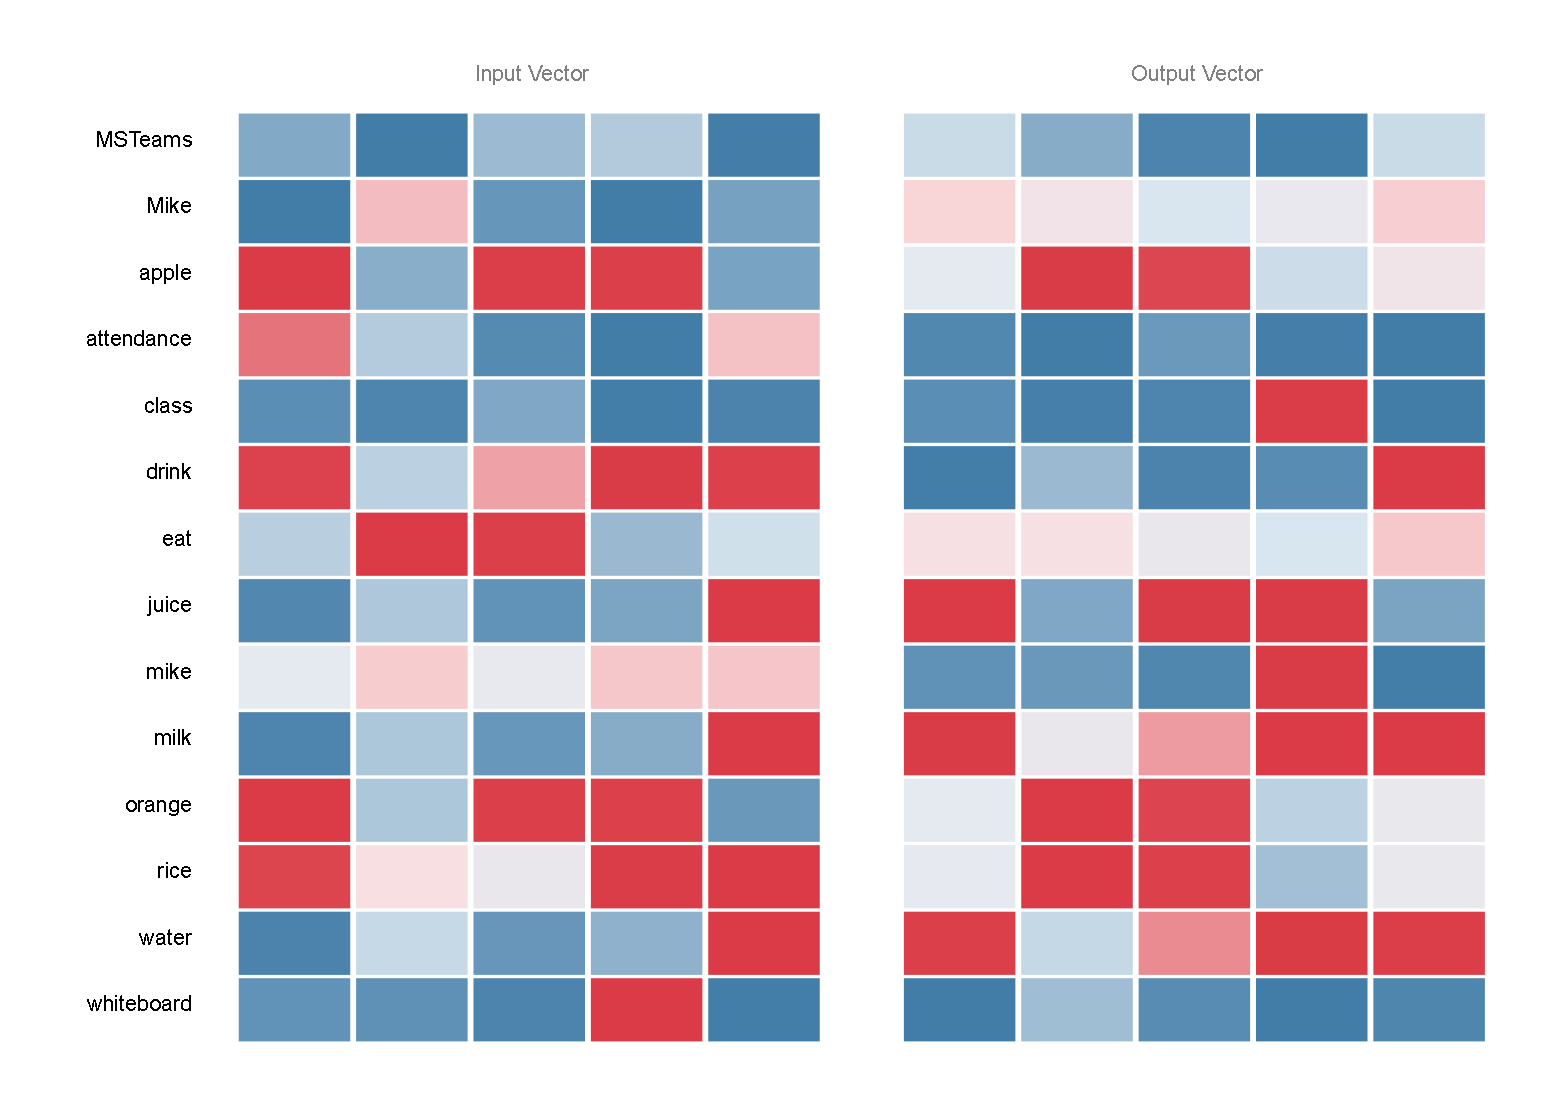